In [1]:
!pip install sqlalchemy

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy, pyodbc, os

In [166]:
match_data1 = pd.read_csv("D:/Resumes/Companies/1. VIT/Headstrait/Dataset/matches.csv")
ball_data = pd.read_csv("D:/Resumes/Companies/1. VIT/Headstrait/Dataset/deliveries.csv")

In [206]:
match_data1.head() # prints the first five rows

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [168]:
ball_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [209]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             629 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   result           636 non-null    object
 9   dl_applied       636 non-null    int64 
 10  winner           633 non-null    object
 11  win_by_runs      636 non-null    int64 
 12  win_by_wickets   636 non-null    int64 
 13  player_of_match  633 non-null    object
 14  venue            636 non-null    object
 15  umpire1          635 non-null    object
 16  umpire2          635 non-null    object
 17  Season           636 non-null    in

In [211]:
ball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [169]:
match_data1.isnull().sum() # to print the sum of null values

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [171]:
match_data= match_data1.drop(['umpire3'], axis=1) # dropping table umpire3 as it containse null values

In [172]:
match_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


In [212]:
ball_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [213]:
ball_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [175]:
match_data.shape # prints the shape i.e the no of rows and columns in the dataset 

(636, 17)

In [176]:
ball_data.shape

(150460, 21)

In [177]:
match_data.columns # no of columns in the dataset

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [214]:
match_data['season'].unique # List of Seasons

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [233]:
match_data.iloc[0] # To fetch complete details of a particular match

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              05-04-2017
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

In [178]:
print('Matches played till date: ', match_data.shape[0])
print('\nMatches played at unique cities: ', match_data['city'].unique())
print('\nParticipated teams so far: ', match_data['team1'].unique())

Matches played till date:  636

Matches played at unique cities:  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]

Participated teams so far:  ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']


In [179]:
match_data['Season'] = pd.DatetimeIndex(match_data['date']).year
match_data.head()

D:\Cdrive\Users\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13-04-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
D:\Cdrive\Users\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14-04-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
D:\Cdrive\Users\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15-04-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
D:\Cdrive\Users\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16-04-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consist

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Season
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,2017
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2017
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,2017
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,2017
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,2017


In [234]:
# Total number of matches per season
match_per_season = match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


D:\Cdrive\Users\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total matches played in each season')

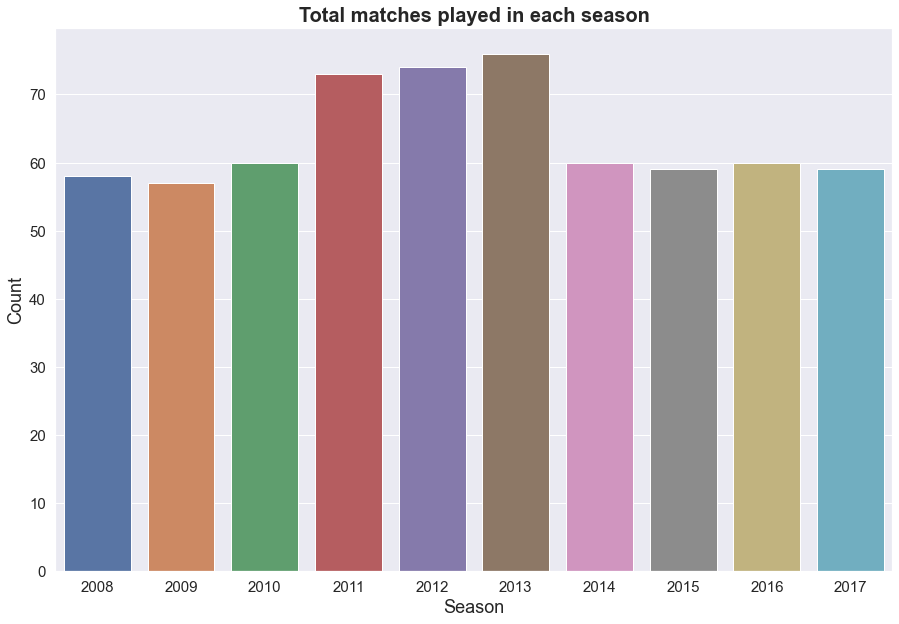

In [239]:
# Visualization for Total number of matches per season
sns.countplot(match_data['Season'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Total matches played in each season', fontsize = 20, fontweight = "bold")

In [182]:
season_data = match_data[['id','Season']].merge(ball_data, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season_data.head()

,Season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [241]:
# Most IPL Matches played in a Venue
match_data.groupby(['venue','id']).count().droplevel(level=1).index.value_counts()

M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Maharashtra Cricket Association Stadium                 15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       11
Punjab Cricket Association IS Bindra Stadium, Mohali    

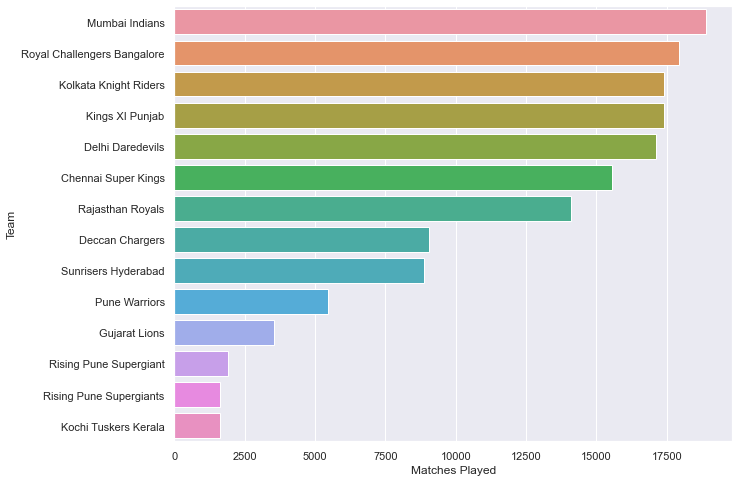

In [253]:
# IPL Matches Played by Each Team
plt.figure(figsize=(10,8))
data = season_data['bowling_team'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show()

In [252]:
# Most Run Scored by IPL Teams
season_data.groupby(['batting_team'])['total_runs'].sum().sort_values(ascending=False)

batting_team
Mumbai Indians                 24521
Royal Challengers Bangalore    23436
Kings XI Punjab                23068
Kolkata Knight Riders          21965
Delhi Daredevils               21953
Chennai Super Kings            20899
Rajasthan Royals               17703
Sunrisers Hyderabad            11652
Deccan Chargers                11463
Pune Warriors                   6358
Gujarat Lions                   4862
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Kochi Tuskers Kerala            1901
Name: total_runs, dtype: int64

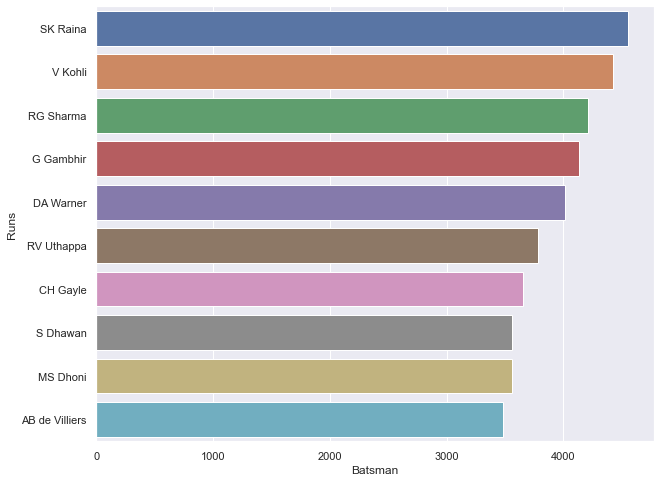

In [256]:
# Most IPL Runs by a Batsman
plt.figure(figsize=(10,8))
data = season_data.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

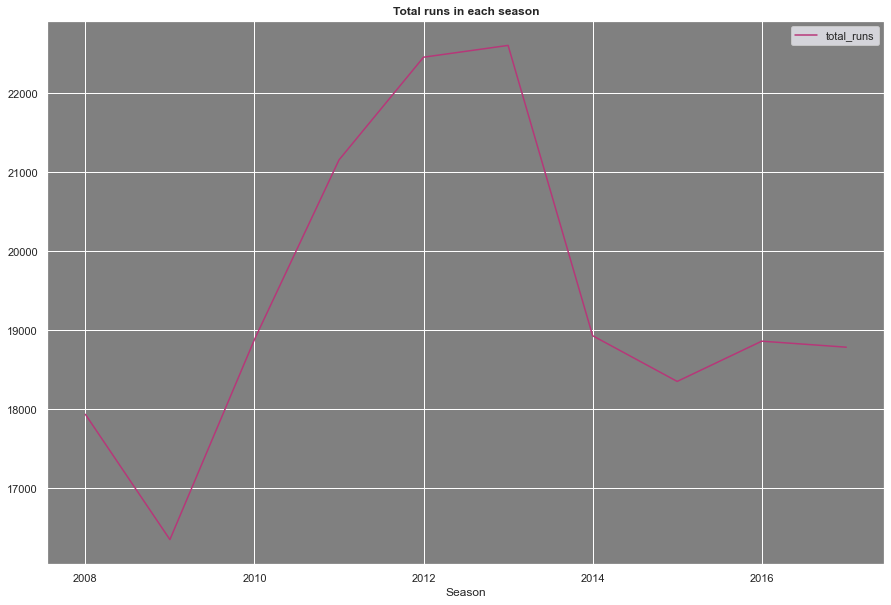

In [254]:
# Visualization for total number of runs scored in each season
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p=season.set_index('Season')
ax=plt.axes()
ax.set(facecolor = "grey")
sns.lineplot(data=p,palette="magma")
plt.title('Total runs in each season', fontsize=12, fontweight="bold")
plt.show()

In [260]:
# Avg Run by Teams in Powerplay
season_data[season_data['over']<6].groupby(['match_id','batting_team']).sum()['total_runs'].groupby('batting_team').mean().sort_values(ascending=False)[2:]

batting_team
Kochi Tuskers Kerala           38.357143
Delhi Daredevils               38.068027
Kolkata Knight Riders          37.993243
Sunrisers Hyderabad            37.657895
Kings XI Punjab                37.614865
Deccan Chargers                37.586667
Chennai Super Kings            37.206107
Royal Challengers Bangalore    36.118421
Mumbai Indians                 35.541401
Rajasthan Royals               35.136752
Rising Pune Supergiants        35.071429
Pune Warriors                  34.822222
Name: total_runs, dtype: float64

In [261]:
#cAverage runs scored per matches w.r.t seasons.
runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per Match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season',inplace=True)
runs_per_season

,matches,total_runs,Runs scored per Match
Season,,,
2008,58,17937,309.258621
2009,57,16353,286.894737
2010,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


In [267]:
# Most IPL Century by a Player
runs = season_data.groupby(['batsman','match_id'])['batsman_runs'].sum()
runs[runs >= 100].droplevel(level=1).groupby('batsman').count().sort_values(ascending=False)[:10]

batsman
CH Gayle          5
V Kohli           4
DA Warner         3
AB de Villiers    3
M Vijay           2
AC Gilchrist      2
V Sehwag          2
BB McCullum       2
HM Amla           2
SR Watson         2
Name: batsman_runs, dtype: int64

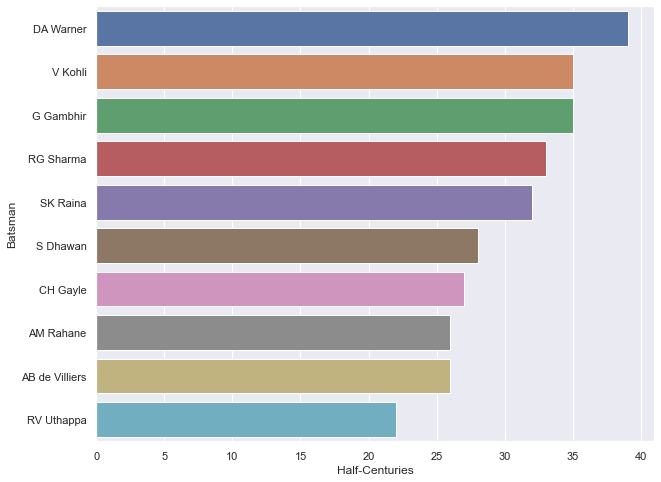

In [268]:
# Most IPL Fifties by a Player
plt.figure(figsize=(10,8))
runs = season_data.groupby(['batsman','match_id'])['batsman_runs'].sum()
data = runs[runs >= 50].droplevel(level=1).groupby('batsman').count().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Half-Centuries')
plt.ylabel('Batsman')
plt.show()

In [272]:
# Each Season's Orange Cap Holder
data = season_data.groupby(['Season','batsman'])['batsman_runs'].sum().groupby('Season').max()
temp_df=pd.DataFrame(season_data.groupby(['Season','batsman'])['batsman_runs'].sum())
print("{0:10}{1:20}{2:30}".format("Season","Player","Runs"))
for season,run in data.items():
    player = temp_df.loc[season][temp_df.loc[season]['batsman_runs'] == run].index[0]
    print(season,'\t ',player,'\t\t',run)

Season    Player              Runs                          
2008 	  SE Marsh 		 616
2009 	  ML Hayden 		 572
2010 	  SR Tendulkar 		 618
2011 	  CH Gayle 		 608
2012 	  CH Gayle 		 733
2013 	  MEK Hussey 		 733
2014 	  RV Uthappa 		 660
2015 	  DA Warner 		 562
2016 	  V Kohli 		 973
2017 	  DA Warner 		 641


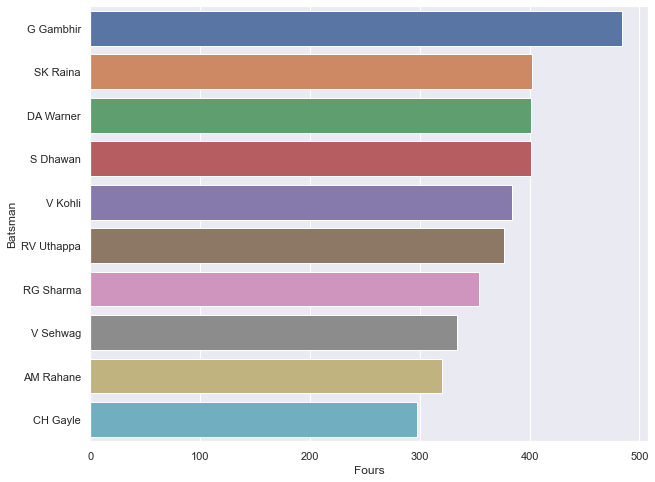

In [273]:
# A Batsman has the most boundary hits (4s).
plt.figure(figsize=(10,8))
data = season_data[season_data['batsman_runs'] == 4]['batsman'].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Fours')
plt.ylabel('Batsman')
plt.show()

In [282]:
# Most Sixes by a player in an IPL Inning
season_data[season_data['batsman_runs'] == 6].groupby(['match_id','batsman']).count()['Season'].sort_values(ascending=False).droplevel(level=0)[:10]

batsman
CH Gayle          17
BB McCullum       13
CH Gayle          13
CH Gayle          12
AB de Villiers    12
ST Jayasuriya     11
M Vijay           11
AC Gilchrist      10
CH Gayle           9
CH Gayle           9
Name: Season, dtype: int64

In [276]:
# Player with the most runs in an IPL season
season_data.groupby(['batsman','Season'])['batsman_runs'].sum().sort_values(ascending=False)[:10]

batsman         Season
V Kohli         2016      973
DA Warner       2016      848
MEK Hussey      2013      733
CH Gayle        2012      733
                2013      720
AB de Villiers  2016      687
RV Uthappa      2014      660
DA Warner       2017      641
V Kohli         2013      639
SR Tendulkar    2010      618
Name: batsman_runs, dtype: int64

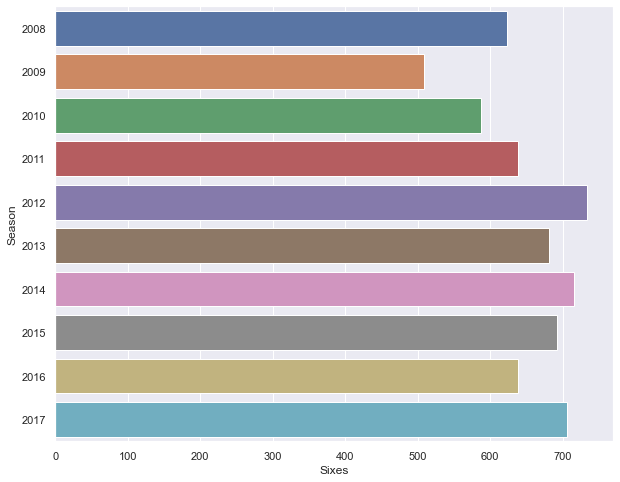

In [277]:
# No. of sixes in IPL seasons
plt.figure(figsize=(10,8))
data = season_data[season_data['batsman_runs'] == 6].groupby('Season').count()['match_id'].sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Sixes')
plt.ylabel('Season')
plt.show()

In [278]:
# IPL Teams' Highest Total
season_data.groupby(['match_id','batting_team']).sum()['total_runs'].droplevel(level=0).sort_values(ascending=False)[:10]

batting_team
Royal Challengers Bangalore    263
Royal Challengers Bangalore    248
Chennai Super Kings            246
Chennai Super Kings            240
Royal Challengers Bangalore    235
Kings XI Punjab                232
Kings XI Punjab                231
Delhi Daredevils               231
Kings XI Punjab                230
Royal Challengers Bangalore    227
Name: total_runs, dtype: int64

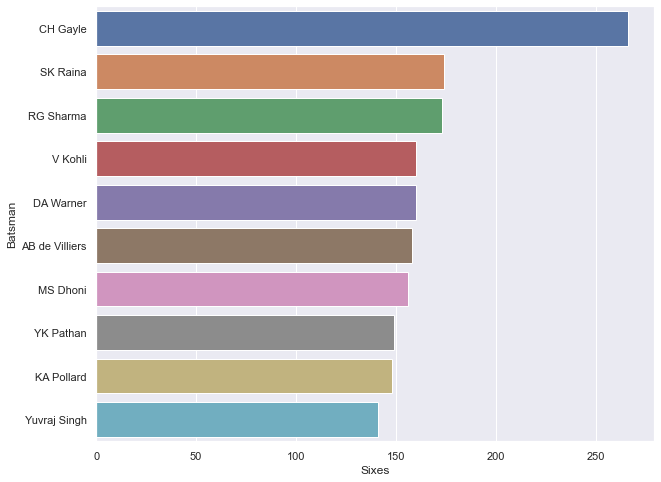

In [283]:
# Most IPL Sixes Hit by a batsman
plt.figure(figsize=(10,8))
data = season_data[season_data['batsman_runs'] == 6]['batsman'].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Sixes')
plt.ylabel('Batsman')
plt.show()

In [294]:
# Highest IPL score for an individual
season_data.groupby(['batsman','match_id'])['batsman_runs'].sum().sort_values(ascending=False)[:10]

batsman         match_id
CH Gayle        411         175
BB McCullum     60          158
AB de Villiers  562         133
                620         129
CH Gayle        372         128
M Vijay         206         127
DA Warner       36          126
V Sehwag        516         122
PC Valthaty     243         120
V Sehwag        279         119
Name: batsman_runs, dtype: int64

In [295]:
# Most run conceded by a bowler in an inning
season_data.groupby(['bowler','match_id'])['total_runs'].sum().droplevel(level=1).sort_values(ascending=False)[:10]

bowler
I Sharma          66
Sandeep Sharma    66
UT Yadav          65
PJ Cummins        65
AB Dinda          63
VR Aaron          63
MG Neser          62
SR Watson         61
R McLaren         61
P Awana           60
Name: total_runs, dtype: int64

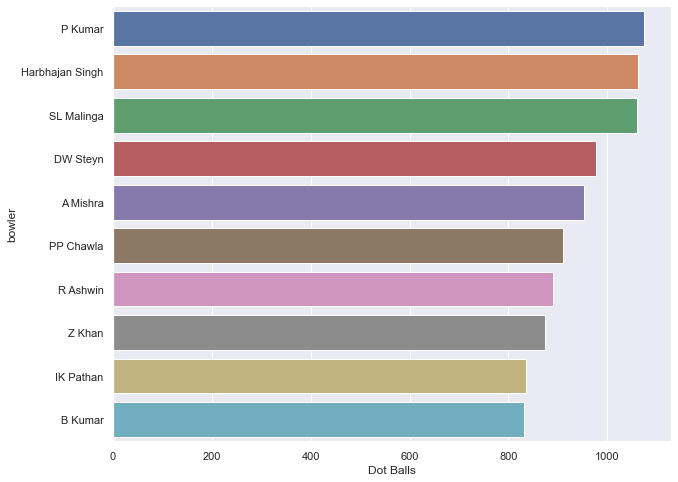

In [304]:
# Bowler with the most dot balls
plt.figure(figsize=(10,8))
data = season_data[season_data['total_runs'] == 0].groupby('bowler').count()['match_id'].sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Dot Balls')
plt.ylabel('bowler')
plt.show()

In [305]:
# Most Maidens bowled over by a Bowler
data = season_data.groupby(['match_id','bowler','over'])['total_runs'].sum()
data = data[data.values == 0].droplevel(level=[0,2])
data.index.value_counts()[:10]

P Kumar           12
IK Pathan          9
SL Malinga         8
DW Steyn           8
Sandeep Sharma     6
DS Kulkarni        6
R Ashwin           5
Z Khan             5
B Kumar            5
MM Patel           4
Name: bowler, dtype: int64

In [307]:
season_data.groupby(['batting_team'])['noball_runs'].agg('sum').sort_values(ascending=False)

batting_team
Royal Challengers Bangalore    86
Mumbai Indians                 79
Rajasthan Royals               74
Kolkata Knight Riders          73
Delhi Daredevils               70
Chennai Super Kings            68
Kings XI Punjab                58
Deccan Chargers                49
Sunrisers Hyderabad            36
Pune Warriors                  24
Gujarat Lions                  17
Kochi Tuskers Kerala           11
Rising Pune Supergiants         7
Rising Pune Supergiant          1
Name: noball_runs, dtype: int64

In [308]:
# IPL Bowler with the most no-balls
season_data[season_data['noball_runs'] != 0]['bowler'].value_counts()[:10]

S Sreesanth    23
I Sharma       21
A Mishra       20
SL Malinga     16
JJ Bumrah      16
UT Yadav       15
AB Dinda       14
JA Morkel      13
SR Watson      13
M Morkel       13
Name: bowler, dtype: int64

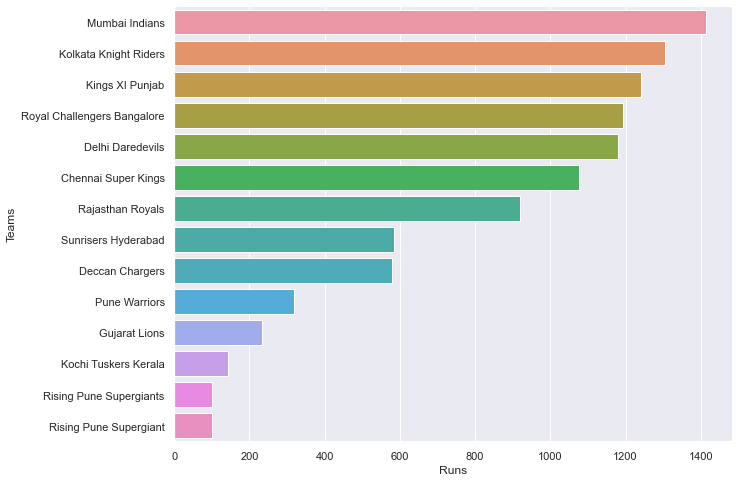

In [309]:
# Most runs in Extras given by a team.
plt.figure(figsize=(10,8))
data = season_data.groupby(['batting_team'])['extra_runs'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Runs')
plt.ylabel('Teams')
plt.show()

In [311]:
season_data.groupby(['batting_team'])['penalty_runs'].agg('sum').sort_values(ascending=False)

batting_team
Delhi Daredevils               10
Chennai Super Kings             0
Deccan Chargers                 0
Gujarat Lions                   0
Kings XI Punjab                 0
Kochi Tuskers Kerala            0
Kolkata Knight Riders           0
Mumbai Indians                  0
Pune Warriors                   0
Rajasthan Royals                0
Rising Pune Supergiant          0
Rising Pune Supergiants         0
Royal Challengers Bangalore     0
Sunrisers Hyderabad             0
Name: penalty_runs, dtype: int64

In [312]:
# Tosses won by each team
match_data['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

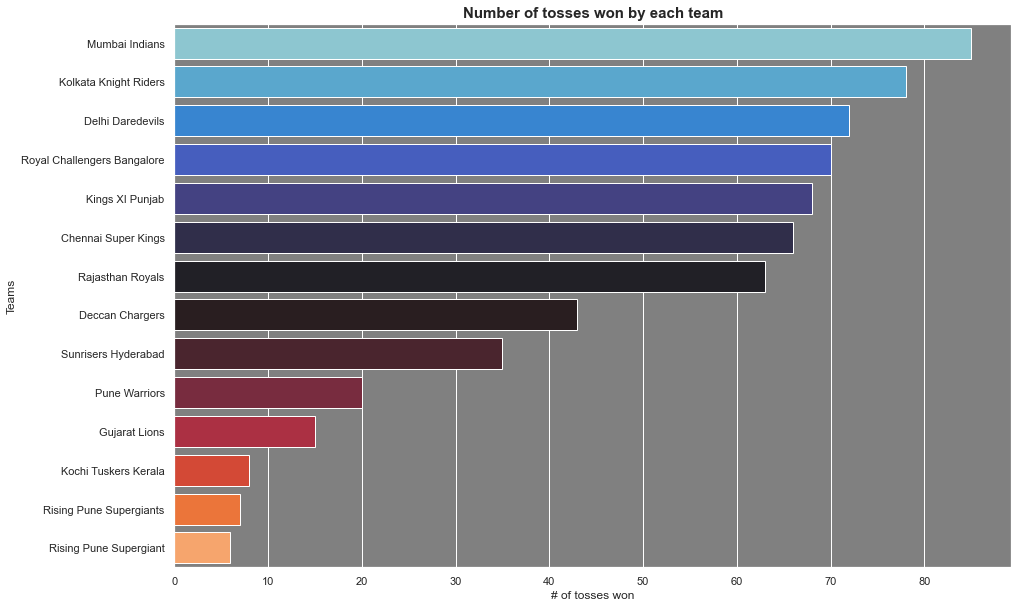

In [313]:
# Visualization for tosses won by each team
toss=match_data['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor = "grey")
sns.set(rc={'figure.figsize':(15,10)},style='darkgrid')
ax.set_title('Number of tosses won by each team',fontsize=15,fontweight="bold")
sns.barplot(y=toss.index, x=toss, orient='h', palette="icefire", saturation=1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()

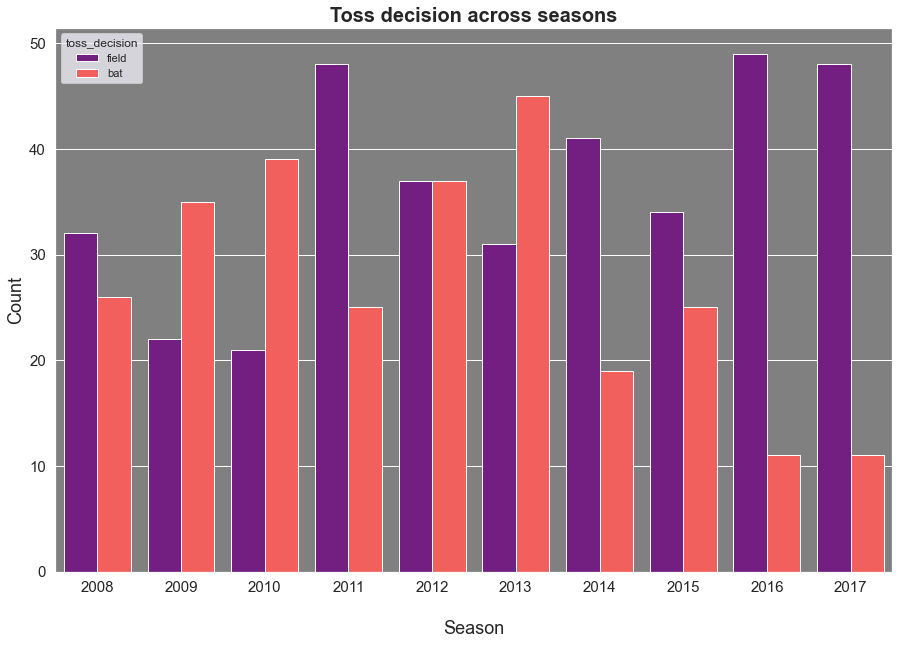

In [187]:
# Descision made by the toss winning teams throught the seasons
ax = plt.axes()
ax.set(facecolor = "grey")
sns.countplot(x='Season', hue='toss_decision', data=match_data, palette="magma", saturation=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('\nSeason', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Toss decision across seasons', fontsize=20, fontweight="bold")
plt.show()

In [314]:
# Match Results
match_data['result'].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [315]:
# stadium with most runs scored
match_data.venue[match_data.result!='runs'].mode()

0    M Chinnaswamy Stadium
Name: venue, dtype: object

In [316]:
# stadium with most wickets taken
match_data.venue[match_data.result!='wickets'].mode()

0    M Chinnaswamy Stadium
Name: venue, dtype: object

In [317]:
# For any given IPL team, which stadium is best when they win the toss?
match_data.venue[match_data.toss_winner=='Chennai Super Kings'][match_data.winner=='Chennai Super Kings'].mode()

0    MA Chidambaram Stadium, Chepauk
Name: venue, dtype: object

In [318]:
# Which is the team that has won maximum number of matches batting second?
match_data.winner[match_data.result!='runs'].mode()

0    Mumbai Indians
Name: winner, dtype: object

In [319]:
# Which is the team that has won maximum number of matches batting first?
match_data.winner[match_data.result!='wickets'].mode()

0    Mumbai Indians
Name: winner, dtype: object

D:\Cdrive\Users\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


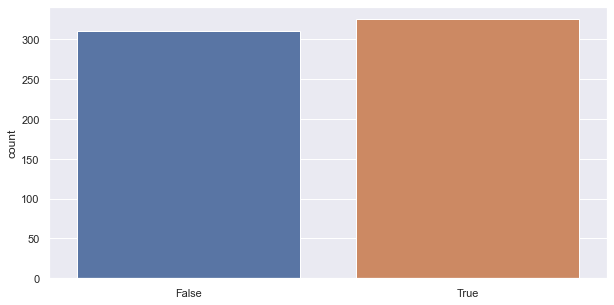

In [320]:
# Does winning the toss mean winning the match?
toss = match_data['toss_winner'] == match_data['winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

D:\Cdrive\Users\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


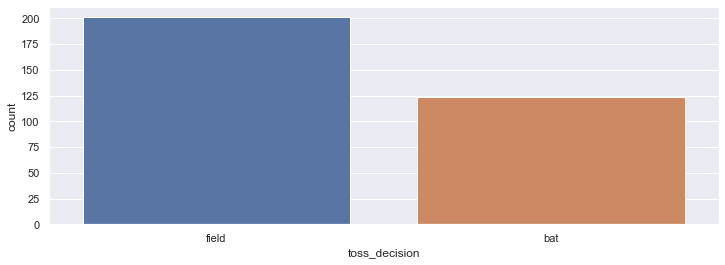

In [321]:
# Does choosing batting or bowling first help in winning matches?
plt.figure(figsize=(12,4))
sns.countplot(match_data.toss_decision[match_data.toss_winner == match_data.winner])
plt.show()

# This shows that, choosing to field first after winning the toss first creates a higher chances to win the match.

In [322]:
# Analyse the performance of a player throughout the IPL
player = (ball_data['batsman']=='SK Raina')
df_raina=ball_data[player]
df_raina.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
515,3,1,Gujarat Lions,Kolkata Knight Riders,4,2,SK Raina,BB McCullum,PP Chawla,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
516,3,1,Gujarat Lions,Kolkata Knight Riders,4,3,SK Raina,BB McCullum,PP Chawla,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
520,3,1,Gujarat Lions,Kolkata Knight Riders,5,1,SK Raina,BB McCullum,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
526,3,1,Gujarat Lions,Kolkata Knight Riders,6,1,SK Raina,BB McCullum,CR Woakes,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
527,3,1,Gujarat Lions,Kolkata Knight Riders,6,2,SK Raina,BB McCullum,CR Woakes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


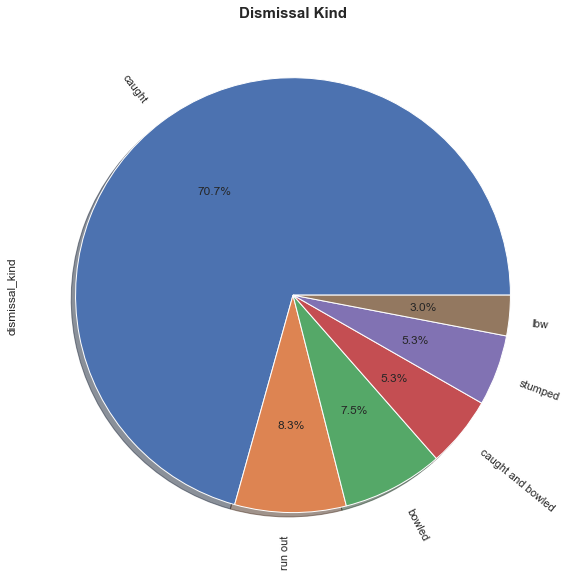

In [323]:
# How a particular player is dismissed throughout the IPL in all the seasons
df_raina["dismissal_kind"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, rotatelabels=True)
plt.title("Dismissal Kind", fontweight="bold",fontsize=15)
plt.show()

In [324]:
# Players scoring stats
def count(df_raina,runs):
    return len(df_raina[df_raina['batsman_runs']==runs])*runs

In [325]:
print("Runs scored from single(s) : ", count(df_raina,1))
print("Runs scored from double(s) : ", count(df_raina,2))
print("Runs scored from 3'(s) : ", count(df_raina,3))
print("Runs scored from four(s) : ", count(df_raina,4))
print("Runs scored from six(s) : ", count(df_raina,6))

Runs scored from single(s) :  1377
Runs scored from double(s) :  484
Runs scored from 3'(s) :  30
Runs scored from four(s) :  1608
Runs scored from six(s) :  1044


In [326]:
# The match that had biggest win in terms of runs margin
match_data[match_data['win_by_runs']==match_data['win_by_runs'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Season
43,44,2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,2017


In [327]:
# The match that had biggest win in terms of wickets margin
match_data[match_data['win_by_wickets']==match_data['win_by_wickets'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Season
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,2017
34,35,2017,Chandigarh,30-04-2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,2017
71,72,2008,Mumbai,27-04-2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,2008
119,120,2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,2009
183,184,2010,Bangalore,18-03-2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,2010
298,299,2011,Mumbai,20-05-2011,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,2011
376,377,2012,Jaipur,20-05-2012,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,2012
390,391,2013,Chandigarh,10-04-2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,2013
542,543,2015,Delhi,26-04-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,2015
590,591,2016,Rajkot,21-04-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,2016


In [328]:
# Player with most runs in the tournament.
runs = ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['Batsman', 'Runs']
y = runs.sort_values(by = 'Runs', ascending = False).head(10).reset_index().drop('index', axis = 1)
y

,Batsman,Runs
0,SK Raina,4548
1,V Kohli,4423
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,4014
5,RV Uthappa,3778
6,CH Gayle,3651
7,S Dhawan,3561
8,MS Dhoni,3560
9,AB de Villiers,3486


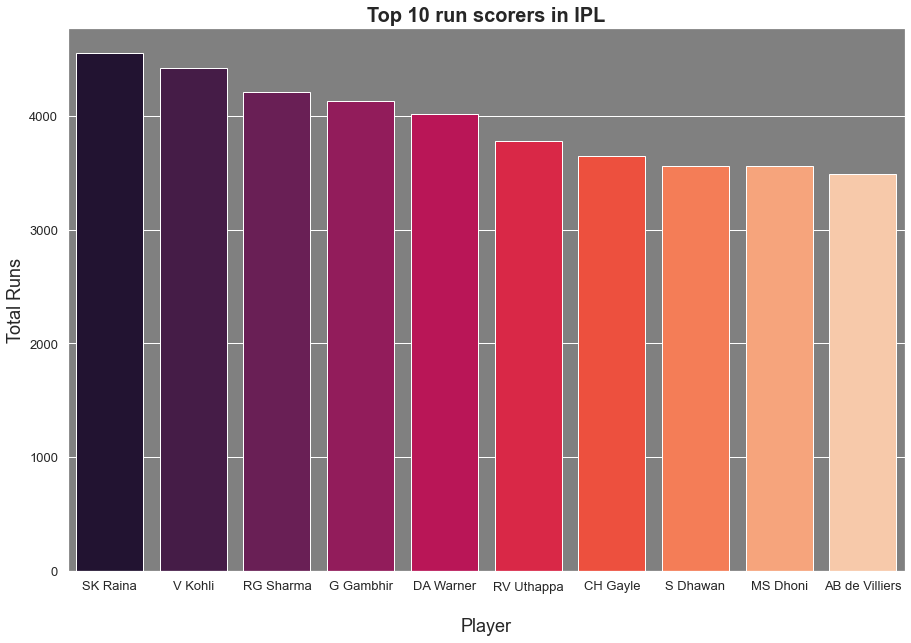

In [329]:
ax = plt.axes()
ax.set(facecolor = "grey")
sns.barplot(x=y['Batsman'], y=y['Runs'], palette='rocket', saturation=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('\nPlayer', fontsize=18)
plt.ylabel('Total Runs', fontsize=18)
plt.title('Top 10 run scorers in IPL', fontsize=20, fontweight="bold")
plt.show()

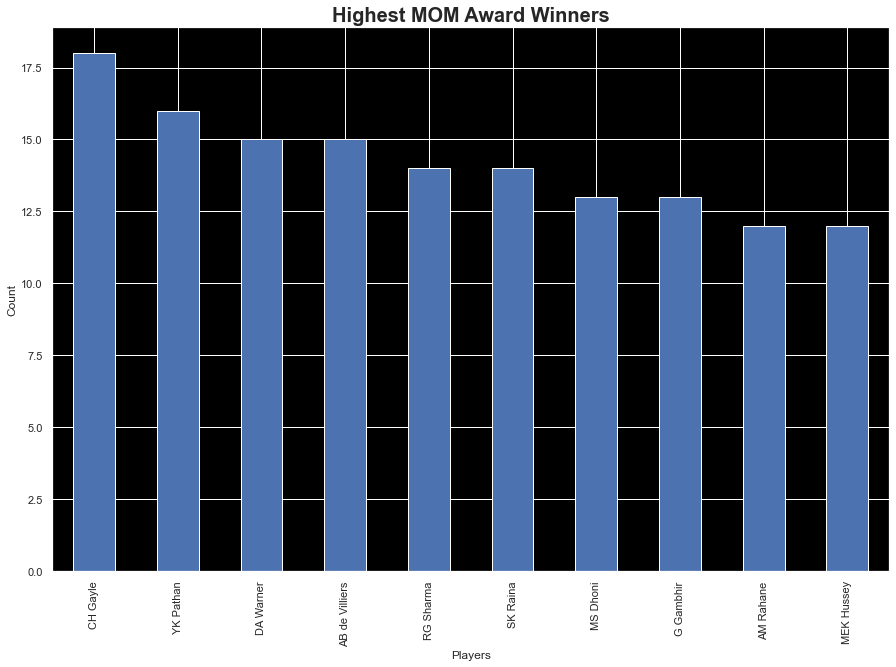

In [331]:
# Highest MOM award winners
ax = plt.axes()
ax.set(facecolor = "black")
match_data.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Players')
plt.ylabel('Count')
plt.title('Highest MOM Award Winners', fontsize=20, fontweight="bold")
plt.show()